
*Missing values per column:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

*Impute missing values for total_bedrooms with median
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 14196 to 15795
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   longitude            16512 non-null  float64
 1   latitude             16512 non-null  float64
 2   housing_median_age   16512 non-null  float64
 3   total_rooms          1651

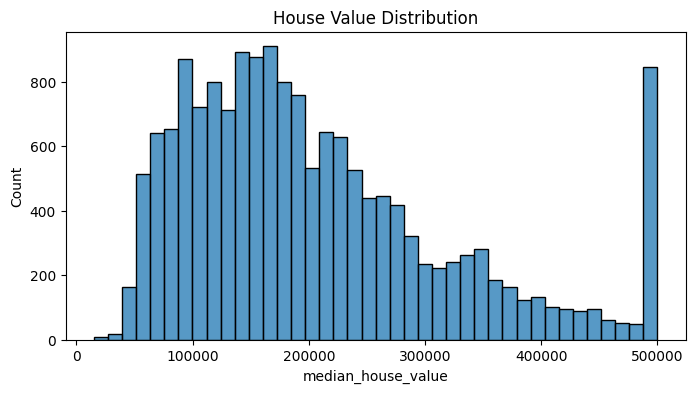

Correlation with house value:
 median_house_value     1.000000
median_income          0.690647
rooms_per_household    0.158485
total_rooms            0.133989
housing_median_age     0.103706
households             0.063714
total_bedrooms         0.047980
population            -0.026032
longitude             -0.046349
latitude              -0.142983
bedrooms_per_room     -0.257419
Name: median_house_value, dtype: float64


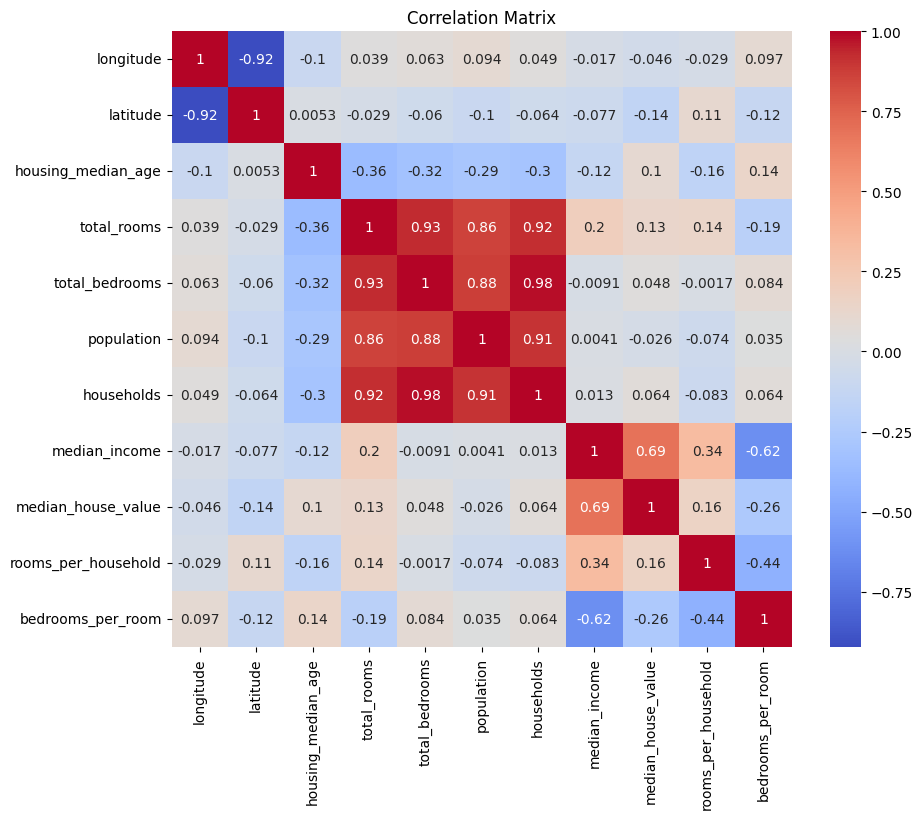

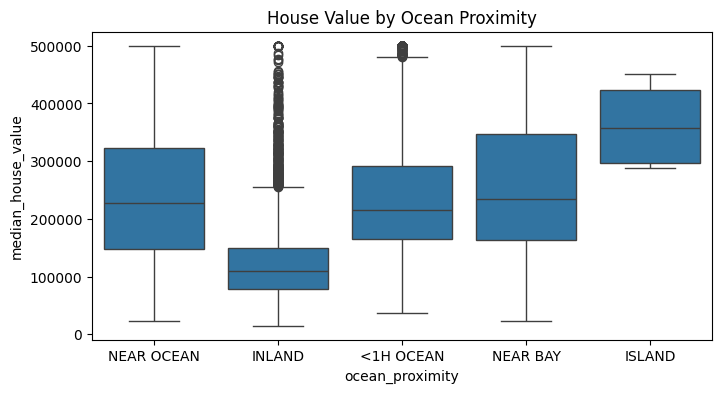

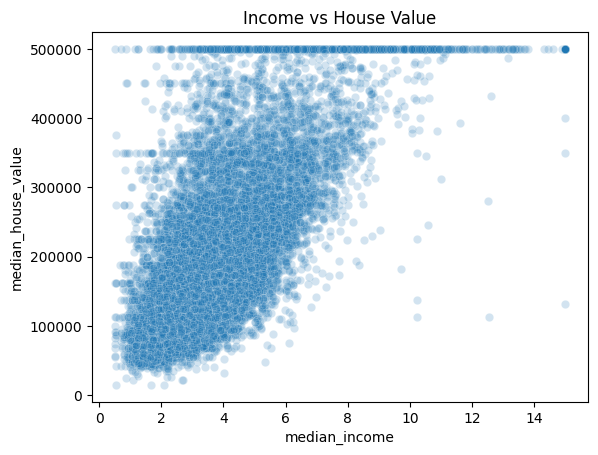

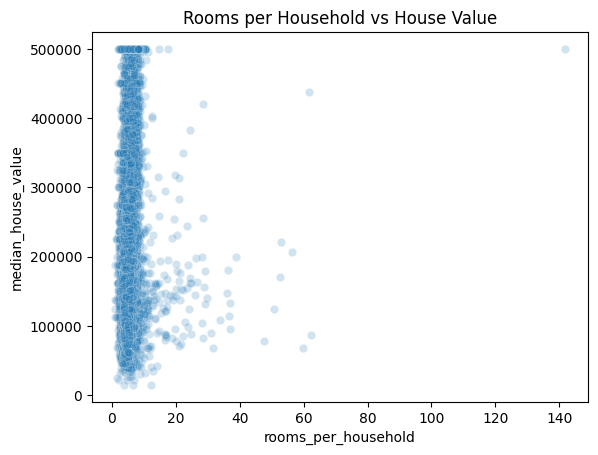

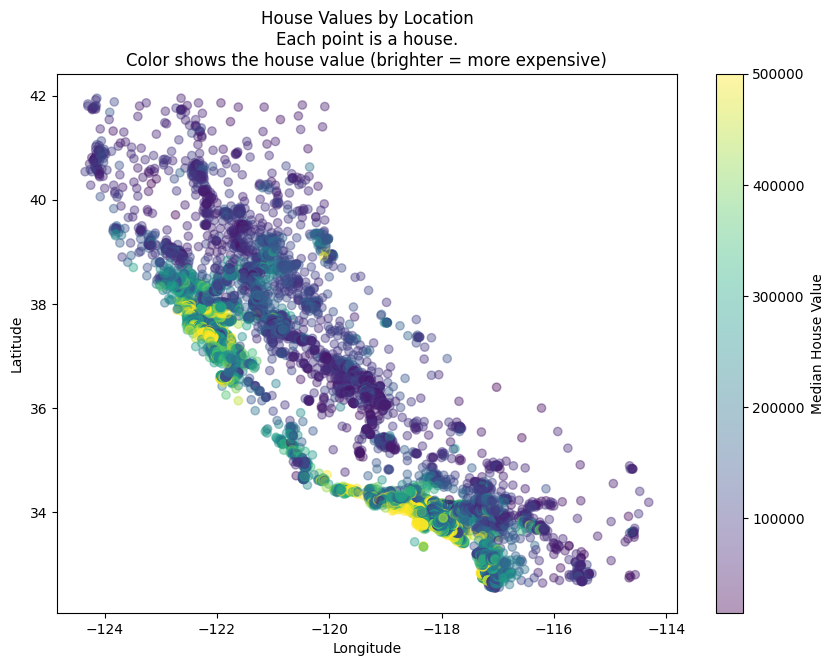

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

def load_data(path):
    df = pd.read_csv(path)
    df.columns = df.columns.str.strip()
    return df

def clean_data(df):
    print("\n*Missing values per column:\n", df.isnull().sum())
    print("\n*Impute missing values for total_bedrooms with median")
    df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())
    print(df.isnull().sum())
    print()
    # Ensure all numeric columns are correct type
    numeric_cols = df.columns.drop(['ocean_proximity'])
    df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')
    return df

def add_features(df):
    df['rooms_per_household'] = df['total_rooms'] / df['households']
    df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
    return df

def assert_valid_data(df):
    assert (df['median_income'] >= 0).all(), "Negative median_income found!"
    assert df.isnull().sum().sum() == 0, "There are missing values!"
    assert (df['median_house_value'] > 0).all(), "Non-positive house values!"

def summarize_and_visualize(df):
    print(df.info())
    print(df.describe())
    # Distribution
    plt.figure(figsize=(8,4))
    sns.histplot(df['median_house_value'], bins=40)
    plt.title('House Value Distribution')
    plt.show()
    # Correlations
    corr = df.corr(numeric_only=True)
    print("Correlation with house value:\n", corr['median_house_value'].sort_values(ascending=False))
    plt.figure(figsize=(10,8))
    sns.heatmap(corr, annot=True, cmap="coolwarm")
    plt.title("Correlation Matrix")
    plt.show()
    # Categorical feature
    plt.figure(figsize=(8,4))
    sns.boxplot(x='ocean_proximity', y='median_house_value', data=df)
    plt.title('House Value by Ocean Proximity')
    plt.show()
    # Scatterplots
    sns.scatterplot(x='median_income', y='median_house_value', data=df, alpha=0.2)
    plt.title('Income vs House Value')
    plt.show()
    sns.scatterplot(x='rooms_per_household', y='median_house_value', data=df, alpha=0.2)
    plt.title('Rooms per Household vs House Value')
    plt.show()

def map(df):
    plt.figure(figsize=(10, 7))
    plt.scatter(df['longitude'], df['latitude'],
            alpha=0.4,
            c=df['median_house_value'],
            cmap='viridis')  # Or 'coolwarm', 'plasma', etc.
    plt.colorbar(label='Median House Value')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('House Values by Location\nEach point is a house.\nColor shows the house value (brighter = more expensive)')
    plt.show()

def main():
    housing = load_data('housing.csv')
    housing = clean_data(housing)
    housing = add_features(housing)
    assert_valid_data(housing)
    train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
    summarize_and_visualize(train_set)
    housing = map(housing)    

if __name__ == "__main__":
    main()

# Summary of findings

- Houses with higher median income tend to have higher median values.
- Proximity to the ocean can affect prices (see boxplot).
- Some areas with more rooms or newer buildings are more expensive.
- High house values are often found where income is higher and closer to desirable locations (like NEAR BAY).

# Självutvärdering

1. "Har något varit utmanande i kunskapskontrollen? Om ja, hur har du hanterat det?"
Ja, en utmaning har varit att hantera och förstå varningsmeddelanden från pandas, speciellt kring hantering av saknade värden och framtida förändringar i biblioteket (t.ex. "chained assignment"-problematiken). Jag löste det genom att läsa dokumentationen och söka efter rekommenderade lösningar, till exempel att alltid göra assignment utan inplace=True när jag arbetar med en DataFrame-kolumn. Dessutom behövde jag tänka extra på att strukturera koden modulärt och att förbereda data korrekt för vidare analys och eventuell modellering.

2. "Vilket betyg anser du att du ska ha och varför?"
Siktat på VG för denna kunskapskontroll. Jag har genomfört en grundlig EDA, samt förbättrat och strukturerat min kod för effektivitet och återanvändbarhet, samt visat på förståelse för datahantering, felsökning och förberedelse för maskininlärning. Jag har proaktivt hanterat möjliga problem, använt assertions och skapat nya features för vidare analys, vilket visar på ansvarstagande och en högre nivå av självständighet i arbetsflödet.

3. "Något du vill lyfta fram till Antonio?"
Ja, arbetet har gett mig en djupare förståelse för vikten av struktur och tydlighet i dataanalysprojekt. Jag uppskattar möjligheten att få förbättra kodens kvalitet och att tänka på hela arbetsflödet, inte bara slutresultatet. Om möjligt skulle jag gärna vilja ha fler exempel eller riktlinjer kring "best practices" för att arbeta med större datamängder och för att förbereda data inför maskininlärningsmodeller, men det kommer säkert :)

# 1

In [35]:
    housing = clean_data(housing)

NameError: name 'housing' is not defined